# Explore here

In this dataset, you will find the following variables:

age. Age of primary beneficiary (numeric)

sex. Gender of the primary beneficiary (categorical)

bmi. Body mass index (numeric)

children. Number of children/dependents covered by health insurance (numeric)

smoker. Is the person a smoker? (categorical)

region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)

charges. Health insurance premium (numerical)

Step 1: Load the dataset.

Step 2: Perform a full EDA
This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

Step 3: Build a linear regression model
You do not need to optimize the hyperparameters. Start by using a default definition, and improve it in the next step.

Step 4: Optimize the previous model
After training the model, if the results are not satisfactory, optimize it if possible.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the above info note:
- there are no empty cells in the data
- there are 7 variables with 1338 samples.

In [5]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
num_smokers = raw_data[raw_data['smoker'] == 'yes']
len(num_smokers)

274

In [7]:
dont_smoke = raw_data[raw_data['smoker'] == 'no']
len(dont_smoke)

1064

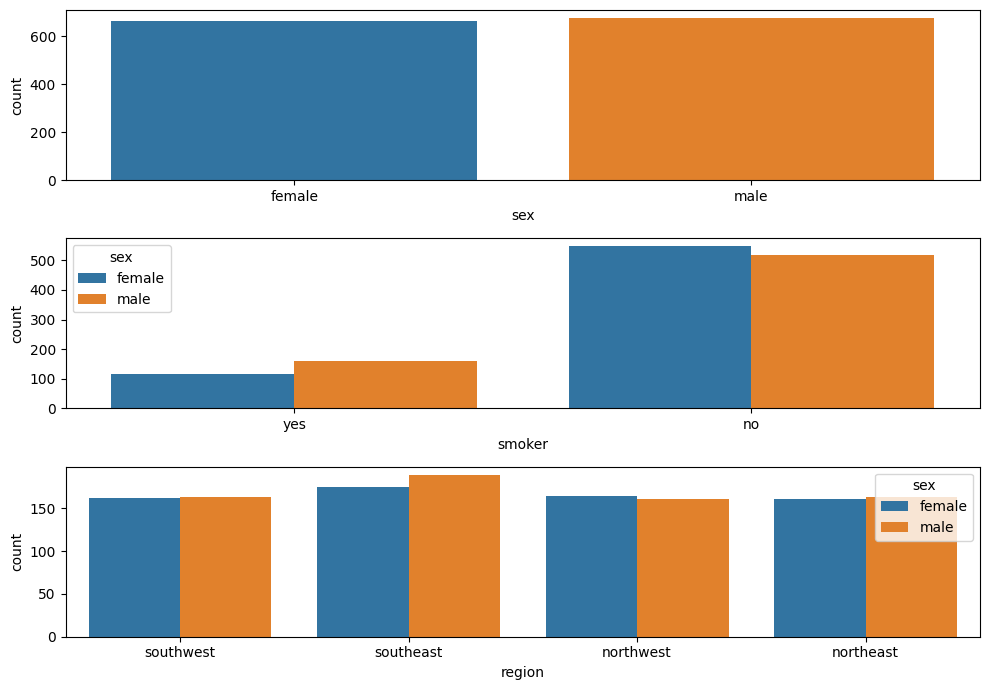

In [8]:
fig, axis = plt.subplots(figsize=(10, 7), nrows=3)
axis = axis.flatten()

variables = ['sex', 'smoker', 'region']
for i, variable in enumerate(variables):
    sns.countplot(ax=axis[i], data=raw_data, x=variable, hue='sex')

plt.tight_layout()

plt.show()

Based on the above plots please note:
- The data is pretty balanced between male and female. 
- The majority of the people in the data are non-smokers
- The regions are relatively balanced.

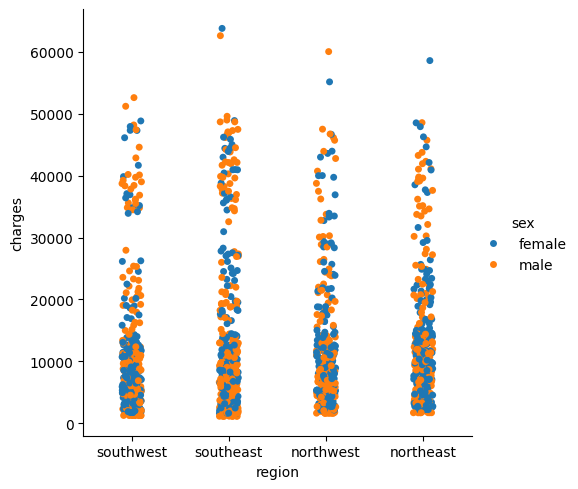

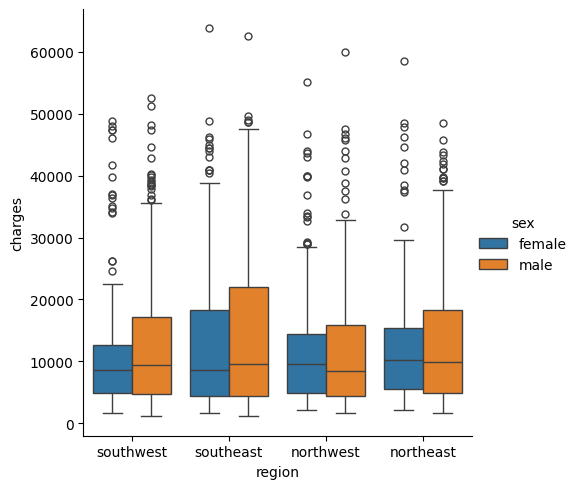

In [9]:
variables = ['region']

for i, variable in enumerate(variables):
    sns.catplot(data=raw_data, x=variable, y='charges', hue='sex')
    sns.catplot(data=raw_data, x=variable, y='charges', hue='sex', kind='box')

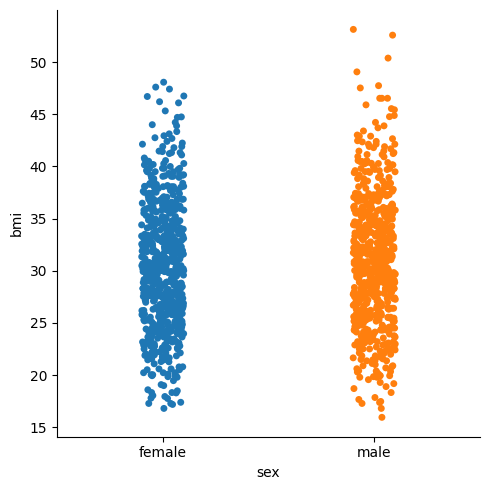

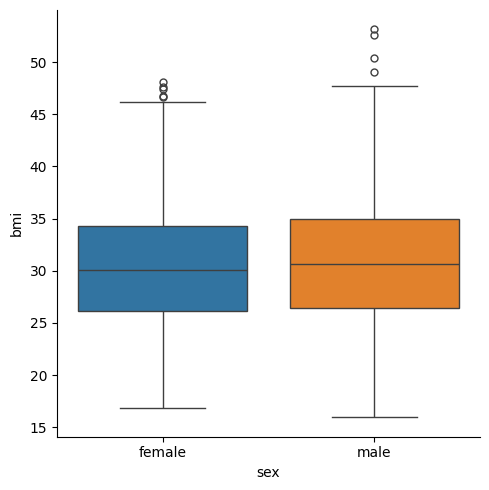

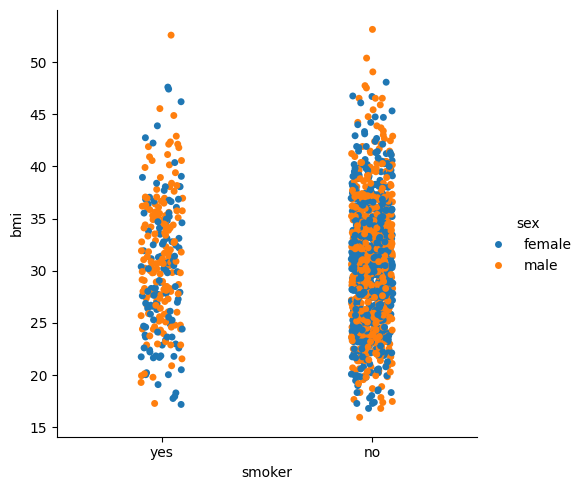

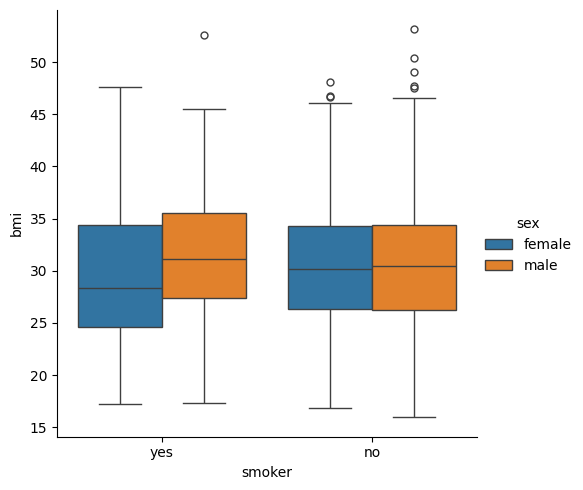

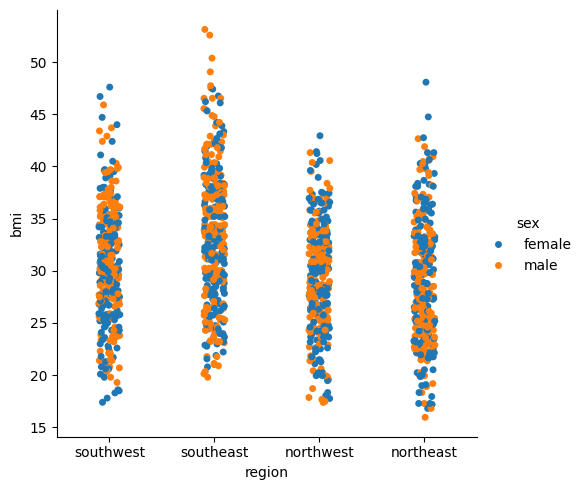

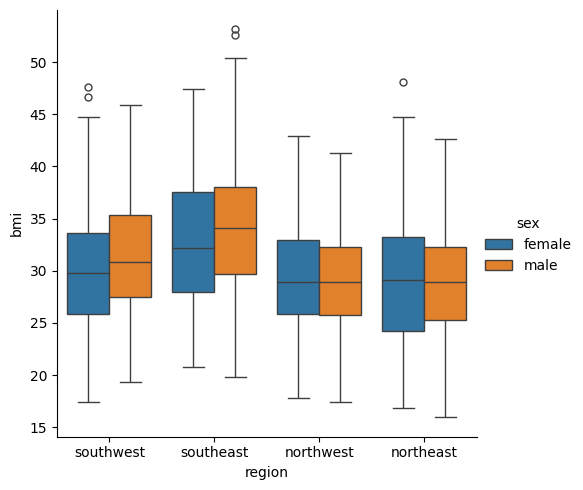

In [10]:
variables = ['sex', 'smoker', 'region']

for i, variable in enumerate(variables):
    sns.catplot(data=raw_data, x=variable, y='bmi', hue='sex')
    sns.catplot(data=raw_data, x=variable, y='bmi', hue='sex', kind='box')


Based on the above plots please note:
- The data has outliers
- The southeast region contains people with the highest bmi's

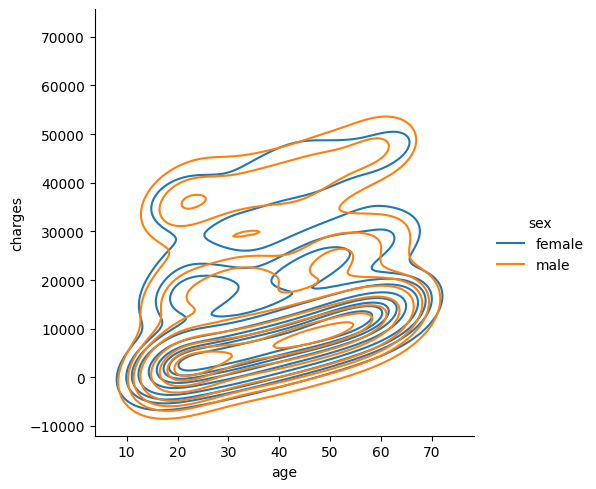

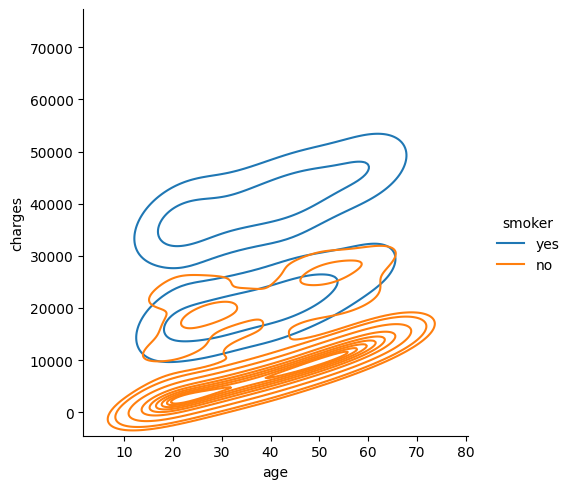

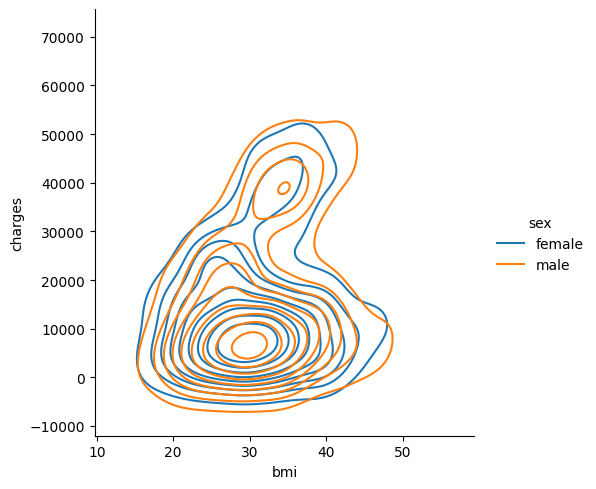

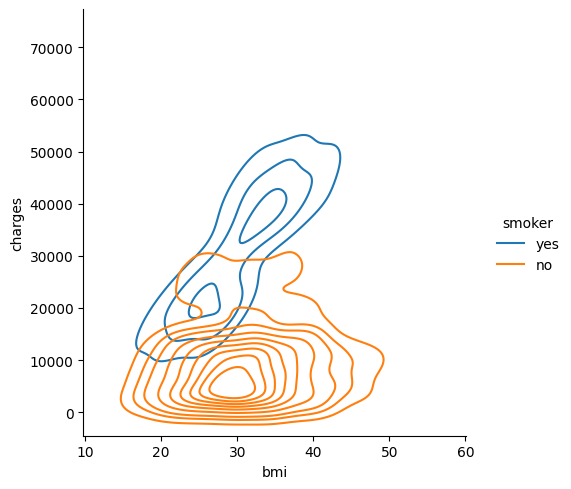

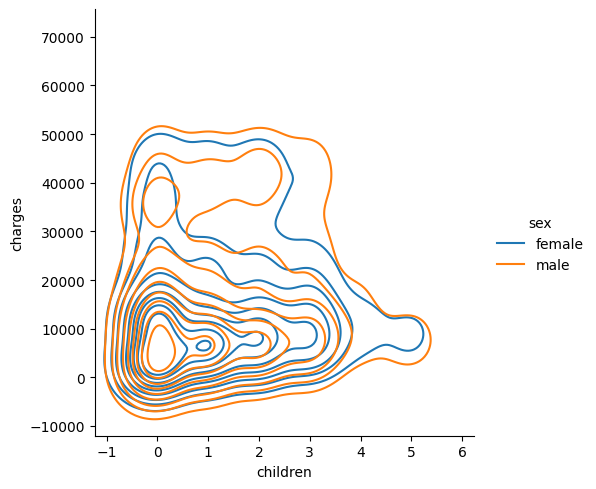

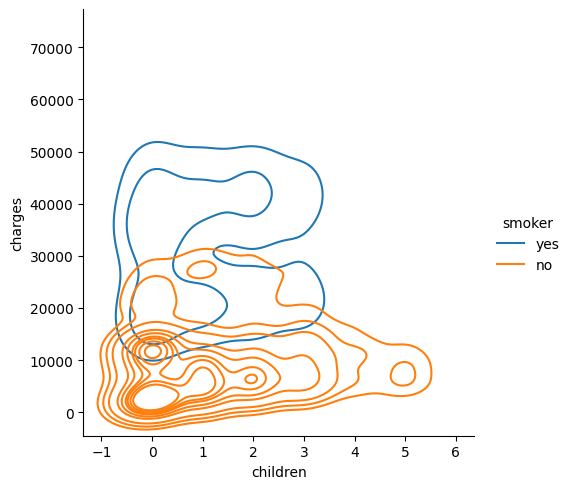

In [11]:
variables = ['age', 'bmi', 'children']

for variable in variables:
    sns.displot(data=raw_data, x=variable, y='charges', hue='sex', kind='kde')
    sns.displot(data=raw_data, x=variable, y='charges', hue='smoker', kind='kde')

Based on the above plots note:
- Men and women have similar medical charges 
- Smokers seem to have higher charges than non-smokers

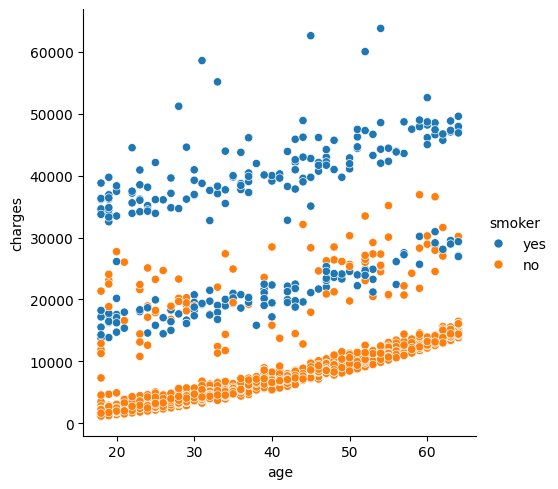

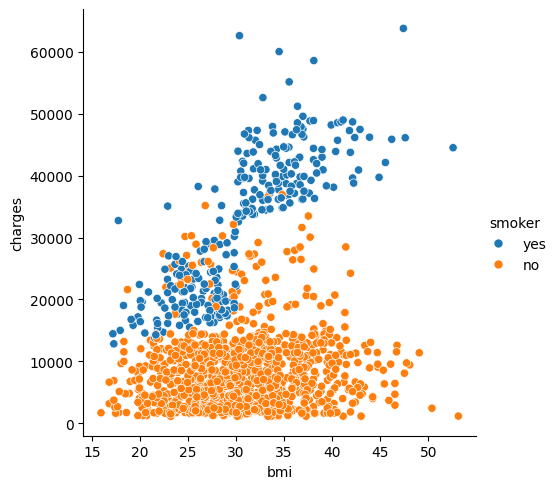

In [12]:
variables = ['age', 'bmi']

for variable in variables:
    sns.relplot(data=raw_data, x=variable, y='charges', hue='smoker')

Using a scatter plot it is resoundingly clear that smokers have higher medical charges than non-smokers.

In [13]:
raw_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

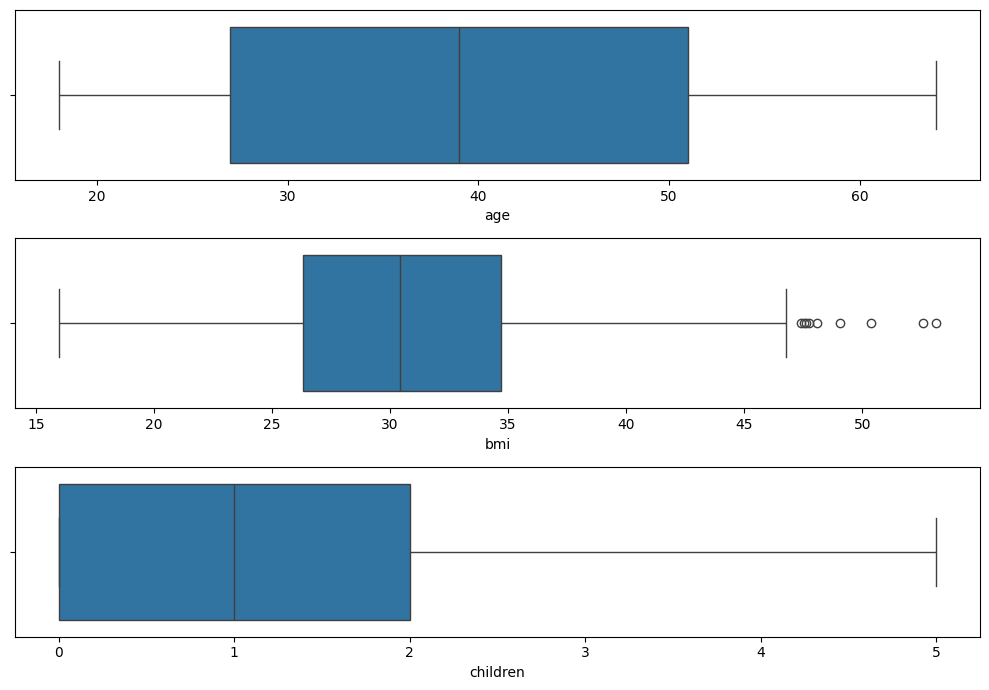

In [14]:
fig, axis = plt.subplots(figsize=(10, 7), nrows=3)
axis = axis.flatten()

variables = ['age', 'bmi', 'children']
for i, variable in enumerate(variables):
    sns.boxplot(ax=axis[i], data=raw_data, x=variable)

plt.tight_layout()

plt.show()

Based on the above plots note the following:
- bmi has some outliers

In [15]:
bmi_stats = raw_data['bmi'].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [16]:
bmi_iqr = bmi_stats['75%'] - bmi_stats['25%']

upper_limit = bmi_stats['75%'] + 1.5 * bmi_iqr
lower_limit = bmi_stats['25%'] - 1.5 * bmi_iqr

print(f"Outlier upper limit: {round(upper_limit, 2)}, lower limit: {lower_limit}")

Outlier upper limit: 47.29, lower limit: 13.7


In [17]:
bmi_outliers = raw_data[raw_data['bmi'] > 47.29]

bmi_outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


There does not appear to be any junk bmi values in the data. I note that there are three bmi's that are 50+. I will not remove any outliers from the data. 

In [18]:
charges_stats = raw_data['charges'].describe()
charges_stats

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [19]:
charges_iqr = charges_stats['75%'] - charges_stats['25%']

upper_limit = charges_stats['75%'] + 1.5 * charges_iqr
lower_limit = charges_stats['25%'] - 1.5 * charges_iqr

print(f"Outlier upper limit: {round(upper_limit, 2)} lower limit: {round(lower_limit, 2)}")

Outlier upper limit: 34489.35 lower limit: -13109.15


In [20]:
charges_outliers = raw_data[raw_data['charges'] > 34489.35]
charges_outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [21]:
print(len(charges_outliers['smoker'] == 'yes'))

139


All of the 139 charges outliers are smokers. There are only 274 smokers in the data. Due to this, I will not be removing the charges outlier data.

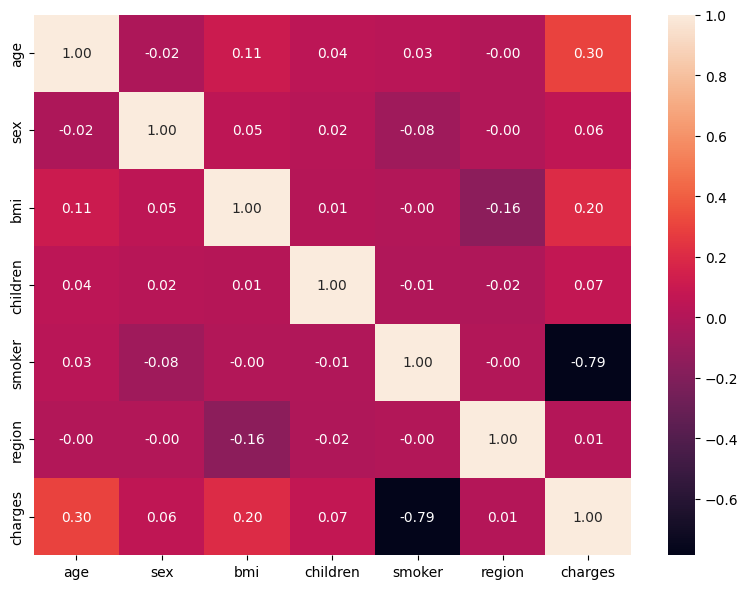

In [22]:
def make_heatmap(data):

    fig, axis = plt.subplots(figsize=(8, 6))
    
    to_factorize = ['sex', 'smoker', 'region']
    graph_data = data.copy()

    for variable in to_factorize:
        graph_data[variable] = pd.factorize(graph_data[variable])[0]

    sns.heatmap(graph_data.corr(), annot=True, fmt='.2f')

    plt.tight_layout()

    plt.show()

make_heatmap(raw_data)

In [23]:
model_data = raw_data[['age', 'bmi', 'smoker', 'children', 'region', 'charges']]
model_data.head()

,age,bmi,smoker,children,region,charges
0,19,27.900,yes,0,southwest,16884.92400
1,18,33.770,no,1,southeast,1725.55230
2,28,33.000,no,3,southeast,4449.46200
3,33,22.705,no,0,northwest,21984.47061
4,32,28.880,no,0,northwest,3866.85520


In [24]:
smoker_model_data = model_data[model_data['smoker'] == 'yes']
smoker_model_data

,age,bmi,smoker,children,region,charges
0,19,27.900,yes,0,southwest,16884.92400
11,62,26.290,yes,0,southeast,27808.72510
14,27,42.130,yes,0,southeast,39611.75770
19,30,35.300,yes,0,southwest,36837.46700
23,34,31.920,yes,1,northeast,37701.87680
...,...,...,...,...,...,...
1313,19,34.700,yes,2,southwest,36397.57600
1314,30,23.655,yes,3,northwest,18765.87545
1321,62,26.695,yes,0,northeast,28101.33305
1323,42,40.370,yes,2,southeast,43896.37630


In [25]:
non_smoker_model_data = model_data[model_data['smoker'] == 'no']
non_smoker_model_data

,age,bmi,smoker,children,region,charges
1,18,33.770,no,1,southeast,1725.55230
2,28,33.000,no,3,southeast,4449.46200
3,33,22.705,no,0,northwest,21984.47061
4,32,28.880,no,0,northwest,3866.85520
5,31,25.740,no,0,southeast,3756.62160
...,...,...,...,...,...,...
1332,52,44.700,no,3,southwest,11411.68500
1333,50,30.970,no,3,northwest,10600.54830
1334,18,31.920,no,0,northeast,2205.98080
1335,18,36.850,no,0,southeast,1629.83350


## Model for Non-Smoker Data only

In [26]:
label_encoder = LabelEncoder()

non_smoker_model_data.loc[:, 'smoker'] = label_encoder.fit_transform(non_smoker_model_data['smoker'])
non_smoker_model_data

,age,bmi,smoker,children,region,charges
1,18,33.770,0,1,southeast,1725.55230
2,28,33.000,0,3,southeast,4449.46200
3,33,22.705,0,0,northwest,21984.47061
4,32,28.880,0,0,northwest,3866.85520
5,31,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...
1332,52,44.700,0,3,southwest,11411.68500
1333,50,30.970,0,3,northwest,10600.54830
1334,18,31.920,0,0,northeast,2205.98080
1335,18,36.850,0,0,southeast,1629.83350


X_non_smoker = non_smoker_model_data.drop('charges', axis=1)
y_non_smoker = non_smoker_model_data['charges']

## Model for Smoker Data Only

In [27]:
# label encode the 'smoker' column
label_encoder = LabelEncoder()
smoker_model_data.loc[:, 'smoker'] = label_encoder.fit_transform(smoker_model_data['smoker'])
smoker_model_data

,age,bmi,smoker,children,region,charges
0,19,27.900,0,0,southwest,16884.92400
11,62,26.290,0,0,southeast,27808.72510
14,27,42.130,0,0,southeast,39611.75770
19,30,35.300,0,0,southwest,36837.46700
23,34,31.920,0,1,northeast,37701.87680
...,...,...,...,...,...,...
1313,19,34.700,0,2,southwest,36397.57600
1314,30,23.655,0,3,northwest,18765.87545
1321,62,26.695,0,0,northeast,28101.33305
1323,42,40.370,0,2,southeast,43896.37630


In [28]:
# one hot encode the 'region' column
one_hot = OneHotEncoder(sparse_output=False)

one_hot_smoker_region = one_hot.fit_transform(smoker_model_data[['region']])
one_hot_smoker_region_df = pd.DataFrame(one_hot_smoker_region, columns=one_hot.get_feature_names_out(['region']))
smoker_model_data = smoker_model_data.reset_index(drop=True)
one_hot_smoker_region_df = one_hot_smoker_region_df.reset_index(drop=True)
smoker_model_data = pd.concat([smoker_model_data.drop(columns=['region']), one_hot_smoker_region_df], axis=1)

smoker_model_data

,age,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,16884.92400,0.0,0.0,0.0,1.0
1,62,26.290,0,0,27808.72510,0.0,0.0,1.0,0.0
2,27,42.130,0,0,39611.75770,0.0,0.0,1.0,0.0
3,30,35.300,0,0,36837.46700,0.0,0.0,0.0,1.0
4,34,31.920,0,1,37701.87680,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
269,19,34.700,0,2,36397.57600,0.0,0.0,0.0,1.0
270,30,23.655,0,3,18765.87545,0.0,1.0,0.0,0.0
271,62,26.695,0,0,28101.33305,1.0,0.0,0.0,0.0
272,42,40.370,0,2,43896.37630,0.0,0.0,1.0,0.0


In [29]:
X_smoker = smoker_model_data.drop('charges', axis=1)
Y_smoker = smoker_model_data['charges']

In [30]:
X_smoker

,age,bmi,smoker,children,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0.0,0.0,0.0,1.0
1,62,26.290,0,0,0.0,0.0,1.0,0.0
2,27,42.130,0,0,0.0,0.0,1.0,0.0
3,30,35.300,0,0,0.0,0.0,0.0,1.0
4,34,31.920,0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
269,19,34.700,0,2,0.0,0.0,0.0,1.0
270,30,23.655,0,3,0.0,1.0,0.0,0.0
271,62,26.695,0,0,1.0,0.0,0.0,0.0
272,42,40.370,0,2,0.0,0.0,1.0,0.0


In [31]:
Y_smoker

0      16884.92400
1      27808.72510
2      39611.75770
3      36837.46700
4      37701.87680
          ...     
269    36397.57600
270    18765.87545
271    28101.33305
272    43896.37630
273    29141.36030
Name: charges, Length: 274, dtype: float64

In [32]:
X_smoker_train, X_smoker_test, y_smoker_train, y_smoker_test = train_test_split(X_smoker, Y_smoker, test_size=0.2, random_state=42)

In [33]:
X_smoker_train

,age,bmi,smoker,children,region_northeast,region_northwest,region_southeast,region_southwest
10,36,35.200,0,1,0.0,0.0,1.0,0.0
256,39,29.925,0,1,1.0,0.0,0.0,0.0
120,30,37.800,0,2,0.0,0.0,0.0,1.0
33,32,17.765,0,2,0.0,1.0,0.0,0.0
173,51,37.050,0,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
188,34,27.835,0,1,0.0,1.0,0.0,0.0
71,31,34.390,0,3,0.0,1.0,0.0,0.0
106,19,30.250,0,0,0.0,0.0,1.0,0.0
270,30,23.655,0,3,0.0,1.0,0.0,0.0


In [34]:
X_smoker_test

,age,bmi,smoker,children,region_northeast,region_northwest,region_southeast,region_southwest
30,29,27.940,0,1,0.0,0.0,1.0,0.0
164,23,32.780,0,2,0.0,0.0,1.0,0.0
194,24,20.520,0,0,1.0,0.0,0.0,0.0
125,18,33.535,0,0,1.0,0.0,0.0,0.0
265,42,24.605,0,2,1.0,0.0,0.0,0.0
232,19,44.880,0,0,0.0,0.0,1.0,0.0
259,61,36.300,0,1,0.0,0.0,0.0,1.0
201,47,36.080,0,1,0.0,0.0,1.0,0.0
255,26,27.060,0,0,0.0,0.0,1.0,0.0
216,28,31.680,0,0,0.0,0.0,1.0,0.0


In [35]:
y_smoker_train

10     38709.17600
256    22462.04375
120    39241.44200
33     32734.18630
173    46255.11250
          ...     
188    20009.63365
71     38746.35510
106    32548.34050
270    18765.87545
102    48885.13561
Name: charges, Length: 219, dtype: float64

In [36]:
y_smoker_test

30     19107.77960
164    36021.01120
194    14571.89080
125    34617.84065
265    21259.37795
232    39722.74620
259    47403.88000
201    42211.13820
255    17043.34140
216    34672.14720
79     24393.62240
148    19539.24300
226    34166.27300
263    46718.16325
155    21195.81800
140    40932.42950
199    18767.73770
60     24869.83680
84     21659.93010
237    18328.23810
45     37133.89820
73     42124.51530
178    19798.05455
230    52590.82939
260    38344.56600
208    20234.85475
115    58571.07448
42     36149.48350
9      48173.36100
114    45702.02235
22     43578.93940
117    15359.10450
24     47291.05500
118    17468.98390
126    42983.45850
75     35491.64000
229    36898.73308
231    40941.28540
6      35585.57600
68     42112.23560
46     20984.09360
124    40182.24600
66     48549.17835
25     22412.64850
112    45863.20500
204    44423.80300
19     37165.16380
269    36397.57600
132    40003.33225
262    62592.87309
86     15006.57945
152    17748.50620
157    17904

In [37]:
scaler = MinMaxScaler()

scaled_X_smoker_train = scaler.fit_transform(X_smoker_train)
scaled_X_smoker_test = scaler.fit_transform(X_smoker_test)

In [38]:
smoker_model = LinearRegression()
smoker_model.fit(scaled_X_smoker_train, y_smoker_train)

LinearRegression()

In [39]:
r2 = smoker_model.score(scaled_X_smoker_test, y_smoker_test)
r2

0.5912411075166462

## Use label encoding

In [40]:
# label encode 'smoker'
label_encoder = LabelEncoder()

label_data = model_data.copy()
label_data['smoker'] = label_encoder.fit_transform(label_data['smoker'])
label_data['region'] = label_encoder.fit_transform(label_data['region'])
label_data

,age,bmi,smoker,children,region,charges
0,19,27.900,1,0,3,16884.92400
1,18,33.770,0,1,2,1725.55230
2,28,33.000,0,3,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,0,3,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


In [41]:
X_label = label_data.drop('charges', axis = 1)
y_label = label_data['charges']

In [42]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

In [43]:
X_train_label

,age,bmi,smoker,children,region
560,46,19.950,0,2,1
1285,47,24.320,0,0,0
1142,52,24.860,0,0,2
969,39,34.320,0,5,2
486,54,21.470,0,3,1
...,...,...,...,...,...
1095,18,31.350,0,4,0
1130,39,23.870,0,5,2
1294,58,25.175,0,0,0
860,37,47.600,1,2,3


In [44]:
X_test_label

,age,bmi,smoker,children,region
764,45,25.175,0,2,0
887,36,30.020,0,0,1
890,64,26.885,1,0,1
1293,46,25.745,0,3,1
259,19,31.920,1,0,1
...,...,...,...,...,...
109,63,35.090,1,0,2
575,58,27.170,0,0,1
535,38,28.025,0,1,0
543,54,47.410,1,0,2


In [45]:
#ensure all values are positive before scaling the data
X_train_label = X_train_label+1
X_test_label = X_test_label + 1

# box-cox scaling
scaled_X_train_label = pd.DataFrame(power_transform(X_train_label, method='box-cox'), columns=X_train_label.columns)
scaled_X_test_label = pd.DataFrame(power_transform(X_test_label, method='box-cox'), columns=X_test_label.columns)

In [46]:
model = LinearRegression()
model.fit(scaled_X_train_label, y_train_label)

LinearRegression()

In [47]:
r2 = model.score(scaled_X_test_label, y_test_label)
r2

0.7792788087263695

## Use the one hot encoding 

In [48]:
# convert to dataframe and add the encoded data back to the model dataframe
one_hot = OneHotEncoder(sparse_output=False)
variables = ['smoker', 'region']

for variable in variables:
    one_hot_encoded = one_hot.fit_transform(model_data[[variable]])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out([variable]))
    model_data = pd.concat([model_data.drop(columns=[variable]), one_hot_df], axis=1)

model_data.head()

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X = model_data.drop('charges', axis = 1)
y = model_data['charges']

In [50]:
X.head()

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,0.0,1.0,0.0,0.0


In [51]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1.0,0.0,0.0,1.0,0.0,0.0
1285,47,24.320,0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52,24.860,0,1.0,0.0,0.0,0.0,1.0,0.0
969,39,34.320,5,1.0,0.0,0.0,0.0,1.0,0.0
486,54,21.470,3,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1.0,0.0,1.0,0.0,0.0,0.0
1130,39,23.870,5,1.0,0.0,0.0,0.0,1.0,0.0
1294,58,25.175,0,1.0,0.0,1.0,0.0,0.0,0.0
860,37,47.600,2,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [55]:
X_test

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1.0,0.0,1.0,0.0,0.0,0.0
887,36,30.020,0,1.0,0.0,0.0,1.0,0.0,0.0
890,64,26.885,0,0.0,1.0,0.0,1.0,0.0,0.0
1293,46,25.745,3,1.0,0.0,0.0,1.0,0.0,0.0
259,19,31.920,0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0.0,1.0,0.0,0.0,1.0,0.0
575,58,27.170,0,1.0,0.0,0.0,1.0,0.0,0.0
535,38,28.025,1,1.0,0.0,1.0,0.0,0.0,0.0
543,54,47.410,0,0.0,1.0,0.0,0.0,1.0,0.0


In [56]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [57]:
# scale the data 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [58]:
X_train_scaled

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]], shape=(1070, 9))

In [59]:
X_test_scaled

array([[0.58695652, 0.23374808, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.36921571, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.28156018, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.31343492, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.85544527, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.48608975, 0.2       , ..., 0.        , 0.        ,
        1.        ]], shape=(268, 9))

In [60]:
# create a dataframe with the scaled data
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [61]:
X_train_df

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
X_test_df

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.586957,0.233748,0.4,1.0,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.369216,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.281560,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,0.249685,0.6,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021739,0.422340,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
263,0.978261,0.510974,0.0,0.0,1.0,0.0,0.0,1.0,0.0
264,0.869565,0.289529,0.0,1.0,0.0,0.0,1.0,0.0,0.0
265,0.434783,0.313435,0.2,1.0,0.0,1.0,0.0,0.0,0.0
266,0.782609,0.855445,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
# create and train the linear regression model
model = LinearRegression()
model.fit(X_train_df, y_train)

LinearRegression()

In [64]:
r2 = model.score(X_test_df, y_test)
r2

0.7835612781680509

In [65]:
# extract the predictions
y_pred = model.predict(X_test_df)
y_pred

array([ 8782.85774005,  6946.00616178, 36692.78961862,  9293.76399481,
       26892.3854653 , 10930.4693426 ,   -51.66926781, 16903.58959847,
         801.75377139, 11096.33814497, 27921.82342314,  9280.89804844,
        5135.09899539, 38473.40375103, 40294.74226866, 37110.70838579,
       15285.29511135, 35876.36048142,  8964.32101599, 31296.18206846,
        3662.58865867, 10060.38012246,  2271.85612797,  7146.84528117,
       11153.6490928 , 12874.36771134, 14454.49467284,  6041.76037515,
        9795.99627408,  2075.81146924,  8983.76483136, 12974.9031982 ,
        4503.66912798,  3152.08096937,  4355.76323912, 13057.41545516,
        1809.78069588,  8689.41565319, 33069.09793078, 32548.63864575,
        3767.10554366,  4239.32279271, 14096.93612575, 11259.21342311,
        8746.02285217, 11960.39932134,  5206.18041863,  2952.39324939,
       35467.55293311,  9156.84928304, 15797.81163292,  2231.23880979,
       12392.49617259,  1326.83129554, 13343.88353579, 12497.08706262,
      

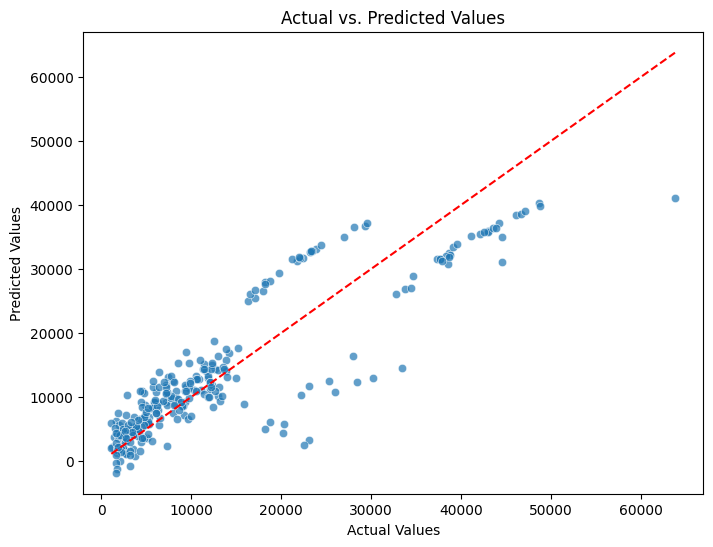

In [66]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

One hot encoding the nominal variables leads to a slightly better model. 